In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score

In [108]:
data = pd.read_csv("Iris dataset.csv")
data = data.drop(columns=["Id"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
data.describe()                        

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
data.isnull().mean()*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [112]:
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

<AxesSubplot:>

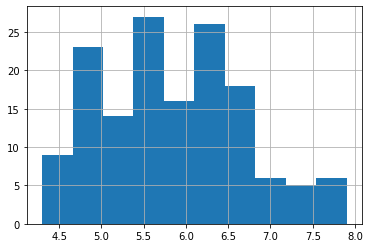

In [113]:
data["SepalLengthCm"].hist()

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

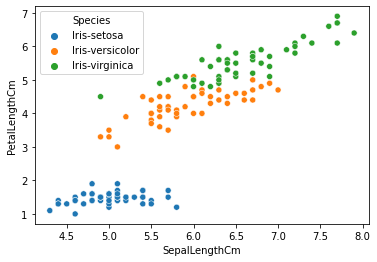

In [114]:
sns.scatterplot(data["SepalLengthCm"], data["PetalLengthCm"], hue = data["Species"])

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

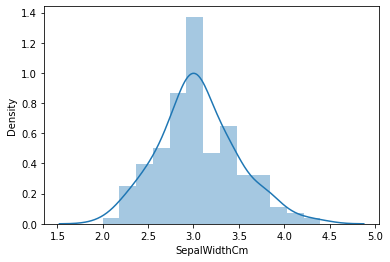

In [115]:
sns.distplot(data["SepalWidthCm"])

In [116]:
data.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa


C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

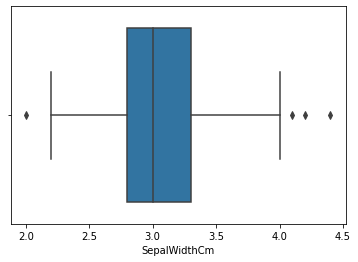

In [117]:
sns.boxplot(data["SepalWidthCm"])

In [118]:
data["SepalWidthCm"] = data[(data["SepalWidthCm"] < data["SepalWidthCm"].mean() + 3 * data["SepalWidthCm"].std()) & (data["SepalWidthCm"] > data["SepalWidthCm"].mean() - 3 * data["SepalWidthCm"].std())] 

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

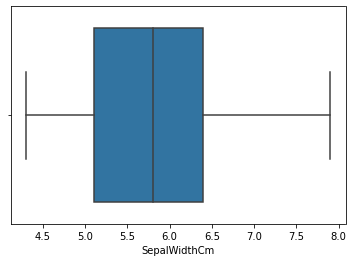

In [119]:
sns.boxplot(data["SepalWidthCm"])

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   149 non-null    object 
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [121]:
data = data.dropna()

In [122]:
data.corr()

,SepalLengthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.875204,0.819851
PetalLengthCm,0.875204,1.000000,0.962598
PetalWidthCm,0.819851,0.962598,1.000000


In [123]:
le = LabelEncoder()

data["Species"] = le.fit_transform(data["Species"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,5.1,1.4,0.2,0
1,4.9,4.9,1.4,0.2,0
2,4.7,4.7,1.3,0.2,0
3,4.6,4.6,1.5,0.2,0
4,5.0,5.0,1.4,0.2,0


In [124]:
x_train = data.drop(columns=["Species"])
y_train = data["Species"]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=None) 

In [125]:
model = LogisticRegression()

In [126]:
model.fit(x_train,y_train)

LogisticRegression()

In [127]:
y_pred = model.predict(x_test)

In [128]:
accuracy_score(y_test, y_pred)*100

100.0